# PCA（Principal Component Analysis，主成分分析）算法使用示例

PCA（Principal Component Analysis，主成分分析）是一种经典的无监督降维与特征提取方法，其核心思想是：**在保留数据最大方差（即最大信息量）的前提下，将原始高维数据投影到一个由少数几个线性无关方向（主成分）张成的低维子空间。**

### 一、算法直观理解
1. **方差最大化**：主成分是数据中方差最大的方向，后续主成分与之前所有主成分正交且方差次大。
2. **几何意义**：相当于对原始坐标系做刚性旋转，使得新坐标轴（主成分）依次指向数据散布最大的方向。
3. **降维**：舍弃方差较小的主成分，用剩余主成分近似原始数据。

### 二、数学推导与关键公式

#### 1. 数据中心化
原始数据矩阵 $X \in \mathbb{R}^{n \times d}$（$n$个样本，$d$个特征）：
\[
\bar{X} = X - \frac{1}{n} \mathbf{1}\mathbf{1}^T X
\]
其中 \( \mathbf{1} \in \mathbb{R}^n \) 是全1向量。

#### 2. 协方差矩阵
计算中心化后数据的协方差矩阵：
\[
C = \frac{1}{n-1} \bar{X}^T \bar{X} \in \mathbb{R}^{d \times d}
\]
协方差矩阵 \( C \) 是对称半正定的，其特征值分解为：
\[
C = V \Lambda V^T
\]
- \( \Lambda = \text{diag}(\lambda_1, \lambda_2, \dots, \lambda_d) \)：特征值按降序排列 \( \lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_d \geq 0 \)
- \( V = [v_1, v_2, \dots, v_d] \)：对应的正交特征向量（即主成分方向）。

#### 3. 降维投影
选择前 \( k \) 个主成分（\( k \ll d \)），构造投影矩阵 \( W = [v_1, v_2, \dots, v_k] \in \mathbb{R}^{d \times k} \)：
\[
Z = \bar{X} W \in \mathbb{R}^{n \times k}
\]
\( Z \) 即为降维后的数据。

#### 4. 重构误差（基于低秩近似）
用前 \( k \) 个主成分重构数据：
\[
\hat{X} = Z W^T + \frac{1}{n} \mathbf{1}\mathbf{1}^T X
\]
重构误差（平方Frobenius范数）为：
\[
\|X - \hat{X}\|_F^2 = \sum_{i=k+1}^d \lambda_i
\]
即被舍弃的特征值之和。

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from pysdkit.models import PCA
from pysdkit.data import test_pca

### 三、算法步骤总结
1. **中心化**：计算并减去均值。
2. **协方差矩阵**：计算$C = \frac{1}{n-1} \bar{X}^T \bar{X}$。
3. **特征分解**：求$C$的特征值与特征向量，按特征值降序排序。
4. **选择主成分**：根据方差贡献率（如$\frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^d \lambda_i} \geq 95\%$）选取前$k$个主成分。
5. **投影降维**：$Z = \bar{X} W$。

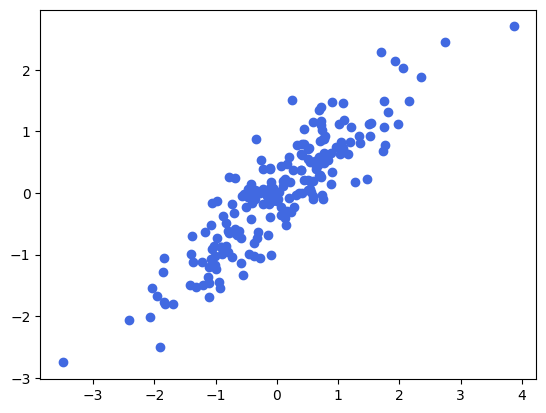

In [4]:
X = test_pca()
plt.scatter(X[:, 0], X[:, 1], color="royalblue")

In [14]:
pca = PCA(n_components=2)
X_decom = pca.fit_transform(X=X)
X_decom.shape

(200, 2)

In [15]:
pca.explained_variance_ratio_

[0.9469577261065206, 0.053042273893479465]

[2.16927747 1.95367725]
[0.04264695 0.00793155] [2.21192441 1.9616088 ]
[-0.46237952  0.51340593]
[0.04264695 0.00793155] [-0.41973258  0.52133748]


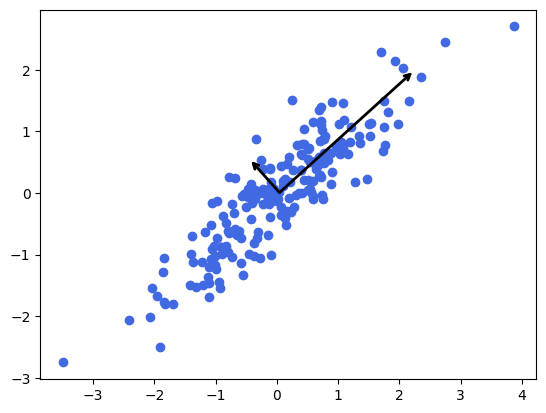

In [16]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle="->",
                      linewidth=2,
                      shrinkA=0,
                      shrinkB=0)
    ax.annotate("", v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], color="royalblue")
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = np.array(vector) * 3 * np.sqrt(length)
    draw_vector(v0=pca.mean_, v1=pca.mean_ + v)